In [8]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

from desilike.samples import Profiles, Chain, plotting
sys.path.append('../bin')
from emulator_fit import get_corr_likelihood

In [18]:
tracer = 'ELG_LOP'
region = 'SGC'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'

template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))

data_type = 'Y1secondgenmocks'
chains_dir = os.path.join(data_dir, 'chains', data_type, 'chains_{}_{}_{{}}{}'.format(template_name, tracer, region))
chain = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'corr_velocileptors_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

data_type = 'Y1secondgenmocks'
chains_dir = os.path.join(data_dir, 'chains', data_type, 'chains_{}_{}_{{}}{}'.format(template_name, tracer, region))
chain_rpcut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'corr_velocileptors_rpcut2.5_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

data_type = 'Y1secondgenmocks'
chains_dir = os.path.join(data_dir, 'chains', data_type, 'chains_{}_{}_{{}}{}'.format(template_name, tracer, region))
chain_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format('complete_'), 'corr_velocileptors_thetacut0.06_{:d}.npy'.format(i))).remove_burnin(0.5)[::10] for i in range(8)])

In [19]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
#g.settings.solid_contour_palefactor = 0.9
#g.settings.alpha_filled_add = 0.3

<Figure size 600x600 with 0 Axes>

Removed no burn in
Removed no burn in
Removed no burn in


/tmp/ipykernel_839342/775964519.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, 'corner_plot_rpcut_thetacut_{}_{}_corr.png'.format(tracer, region)), dpi=300)
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20231013-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


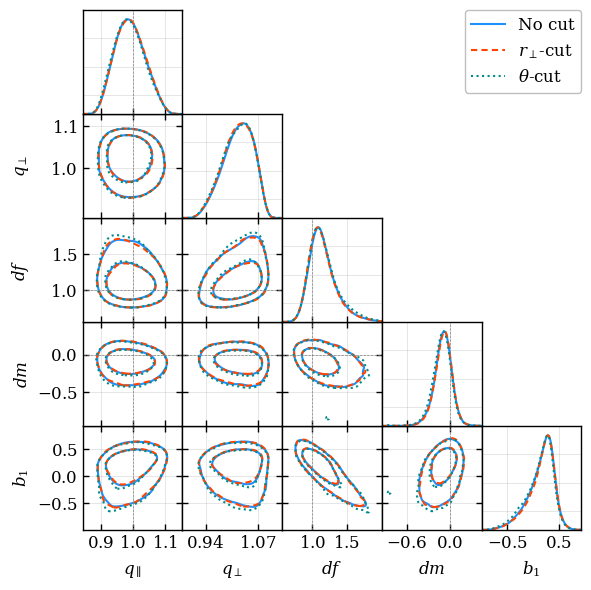

In [22]:
markers = {'qpar': 1., 'qperp': 1., 'df': 1., 'dm': 0.}
#params = ['qiso', 'qap', 'df', 'dm', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4']
params = ['qpar', 'qper', 'df', 'dm', 'b1']
colors = ['dodgerblue', 'orangered', 'darkcyan']
plotting.plot_triangle([chain, chain_rpcut, chain_thetacut], labels=[r'No cut', r'$r_{\perp}$-cut', r'$\theta$-cut'], 
                       markers=markers, params=params,
                       g=g, lws=1.5, contour_lws=1.5, filled=False, colors=colors, contour_colors=colors, contour_ls=['-', '--', ':'],
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'corner_plot_rpcut_thetacut_{}_{}_corr.png'.format(tracer, region)), dpi=300)
plt.show()

In [23]:
chain.params(varied=True)

ParameterCollection(['qpar', 'qper', 'dm', 'df', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4'])

In [22]:
params = ['qiso', 'qap', 'df', 'dm', 'b1', 'b2', 'bs', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4']

In [10]:
chain_masked.params

<bound method BaseParameterCollection.params of Chain(shape=(1080, 40), params=ParameterCollection(['qiso', 'qap', 'dm', 'df', 'b1', 'b2', 'bs', 'logposterior', 'dn', 'b3', 'f_sqrt_Ap', 'm', 'n', 'loglikelihood', 'logprior', 'alpha0', 'alpha2', 'alpha4', 'sn0', 'sn2', 'sn4', 'aweight', 'fweight']))>

In [12]:
print(chain_masked.to_stats(params=params, tablefmt='pretty'))

+--------+--------+--------+--------+-------+-----------------+-----------------+
|        | argmax |  mean  | median |  std  | quantile:1sigma | interval:1sigma |
+--------+--------+--------+--------+-------+-----------------+-----------------+
|  qiso  | 1.006  | 1.002  | 1.002  | 0.014 |  -0.014/+0.014  |  -0.015/+0.013  |
|  qap   | 0.994  | 1.001  | 1.001  | 0.028 |  -0.027/+0.027  |  -0.028/+0.027  |
|   df   | 1.009  | 1.024  | 1.021  | 0.056 |  -0.055/+0.055  |  -0.060/+0.049  |
|   dm   | -0.026 | -0.026 | -0.025 | 0.041 |  -0.040/+0.040  |  -0.036/+0.043  |
|   b1   | 0.320  | 0.291  | 0.298  | 0.058 |  -0.056/+0.055  |  -0.042/+0.065  |
|   b2   |  -1.9  |  -1.0  |  -1.0  |  1.6  |    -1.7/+1.7    |    -1.9/+1.6    |
|   bs   |  0.9   |  1.1   |  1.1   |  2.1  |    -2.2/+2.3    |    -2.3/+2.2    |
| alpha0 |   4    |   9    |   8    |  16   |     -16/+16     |     -17/+15     |
| alpha2 |   9    |   -3   |   -2   |  27   |     -28/+27     |     -26/+28     |
| alpha4 |   -3 